In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading an example dataset, planets, provided by the seaborn package.
# Gives information on planets that astronomers have discovered around other stars 

planets = sns.load_dataset("planets")
planets.shape

(1035, 6)

In [2]:
planets.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
planets.describe().round(1)

,number,orbital_period,mass,distance,year
count,1035.0,992.0,513.0,808.0,1035.0
mean,1.8,2002.9,2.6,264.1,2009.1
std,1.2,26014.7,3.8,733.1,4.0
min,1.0,0.1,0.0,1.4,1989.0
25%,1.0,5.4,0.2,32.6,2007.0
50%,1.0,40.0,1.3,55.2,2010.0
75%,2.0,526.0,3.0,178.5,2012.0
max,7.0,730000.0,25.0,8500.0,2014.0


### Choose one variable and plot that variable four different ways.

In [4]:
# Plotting orbital periods
mass = planets['mass']

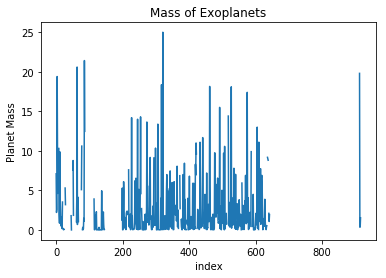

In [5]:
# Line graph

plt.plot(mass)
plt.xlabel('index')
plt.ylabel('Planet Mass')
plt.title('Mass of Exoplanets')

plt.show()

This line graph isn't particularly helpful.  We can see that there is some missing data.  Most of the planets seem to have masses below 10 Jupiter Mass.
Pro: Roughly identifies missing datapoints
Con: Can't really make any other concrete observations.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


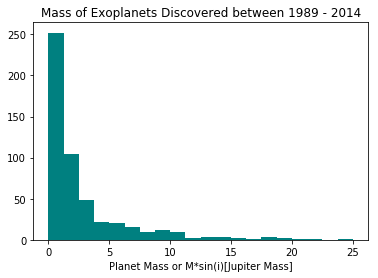

In [6]:
#Histogram

plt.hist(mass, bins= 20, range = [0,25], color = 'teal')
plt.title('Mass of Exoplanets Discovered between 1989 - 2014')
plt.xlabel('Planet Mass or M*sin(i)[Jupiter Mass]')
plt.show()

From this graph, we can tell that most of the planets discovered have masses below 5.  The distribution is right skewed. 
Pro: It's easy to see where most of the data lies.
Con: That's about all it tells us. 

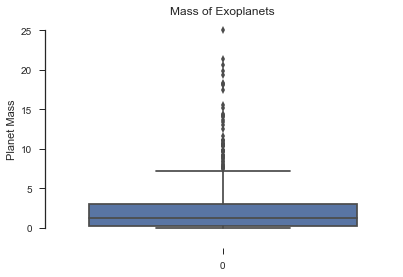

In [7]:
# Comparing groups using boxplots.
sns.set(style="ticks")  #Setting the overall aesthetic

bx = sns.boxplot(data=mass)  
plt.title('Mass of Exoplanets')
bx.set(xlabel='', ylabel='Planet Mass')
sns.despine(offset=10, trim=True)

plt.show()

Again, the boxplot indicates a skew in the data, with many extra large planets as outliers. We can see that the mean planet mass is around 2 and most of the planets have masses below 7.
Pro: We are able to make more specific statistical observations on planet mass data, particularly regarding the distribution of the data.  
Con: Due to the skew in the data, this boxplot is very compact and not easy to read.

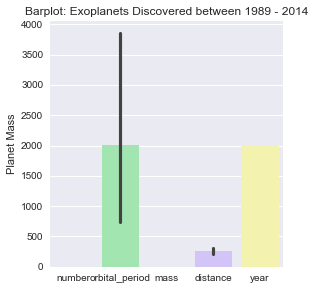

In [8]:
# Bar Plot

# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(data= planets, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Planet Mass")
g.set_xlabels("")
plt.title('Barplot: Exoplanets Discovered between 1989 - 2014')
plt.show()

Because the data for the other columns have much greater numbers, planet mass is obscured here.  This plot isn't useful in looking at mass data.  We can see that there is a lot of error for orbital periods.

### Choose two continuous variables and plot them three different ways.

In [9]:
distance = planets['distance']
yr = planets['year']
op = planets['orbital_period']

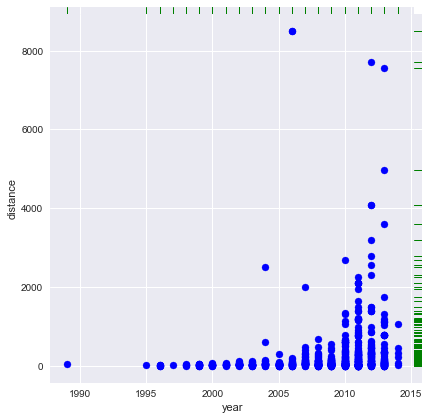

In [10]:
# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(yr, distance, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, height=1, color="g")

This scatterplot shows that, over time, NASA discovered more planets overall and planets that are further away.  We can also see that there is a 6 year gap in the data, where no planets were discovered. The marginal ticks help us see where the data is concentrated in terms of distance, but is not very helpful for years.

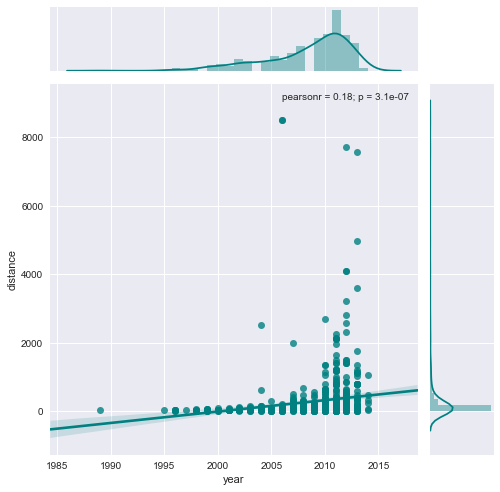

In [11]:
g = sns.jointplot("year", "distance", data=planets, kind="reg",
                 color="teal", size = 7)

The marginal distributions are more helpdul than the ticks, especially when looking at the year data.  We can see that htere is a higher concentration of planets being discovered from 207 onwards.  The trendline for the main graph shows an upwards slope, indicating that more planets that are further away are being discovered over time.  

Although we can glean a lot of information from this graph, it is fairly difficult to read and contains a lot of information to parse through.

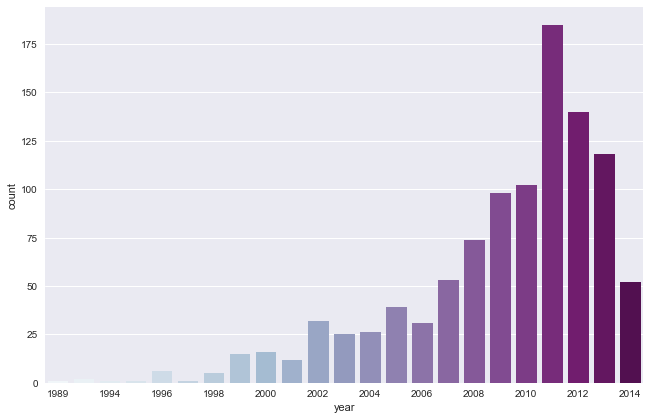

In [12]:
# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

Here we can very clearly see how many planets were discovered each year.  

Year is not really continuous data.  Let's see if there is a correlation between the mass of the planet and its orbital period.

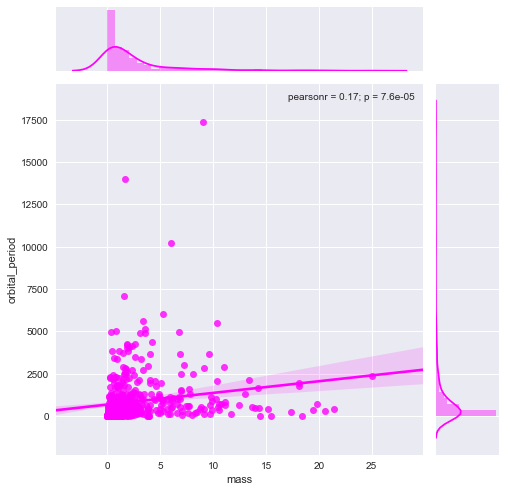

In [13]:
g = sns.jointplot("mass", "orbital_period", data=planets, kind="reg",
                 color="magenta", size = 7)

There does appear to be a slight upward trend, indicating that the bigger the planet, the longer the orbital period.  There are some deviations from this case. With the trendline, we can do some extraplolations.  
From the marginal distributions, we can see that both orbital periods and planet mass are skewed.  

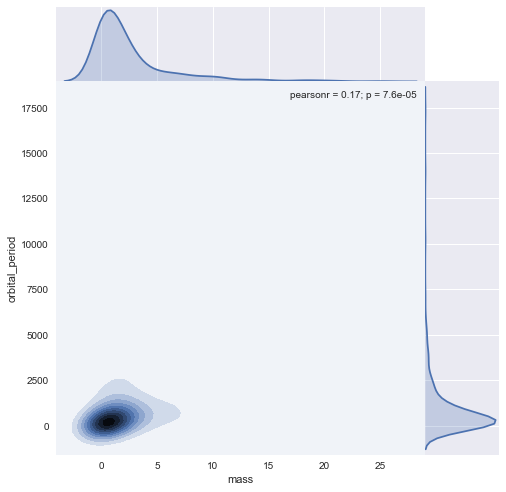

In [14]:
# Joint kernal density estimate
x1 = pd.Series(mass)
x2 = pd.Series(op)

sns.jointplot(x1, x2, kind="kde", size=7, space=0)

The heatmap shows where the data is concentrated -- discovered planets tend to have a low planet mass and low orbital periods.  We are unable to extrapolate data just from looking at this graph.

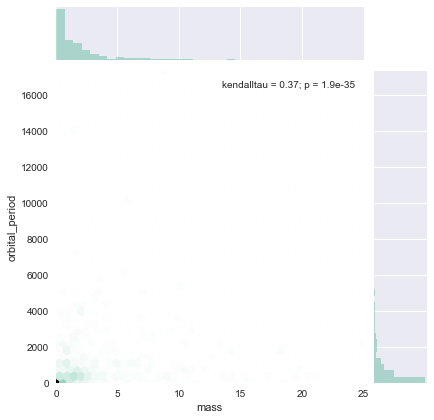

In [15]:
# Hexabin with Marginal Distributions

from scipy.stats import kendalltau

sns.jointplot(x1, x2, kind="hex", stat_func=kendalltau, color="#4CB391")

With the skew for both mass and orbital period, this table is not very helpful.

### Choose one continuous variable and one categorical variable, and plot them six different ways.

Let's see which method is more capable of discovering far away planets.

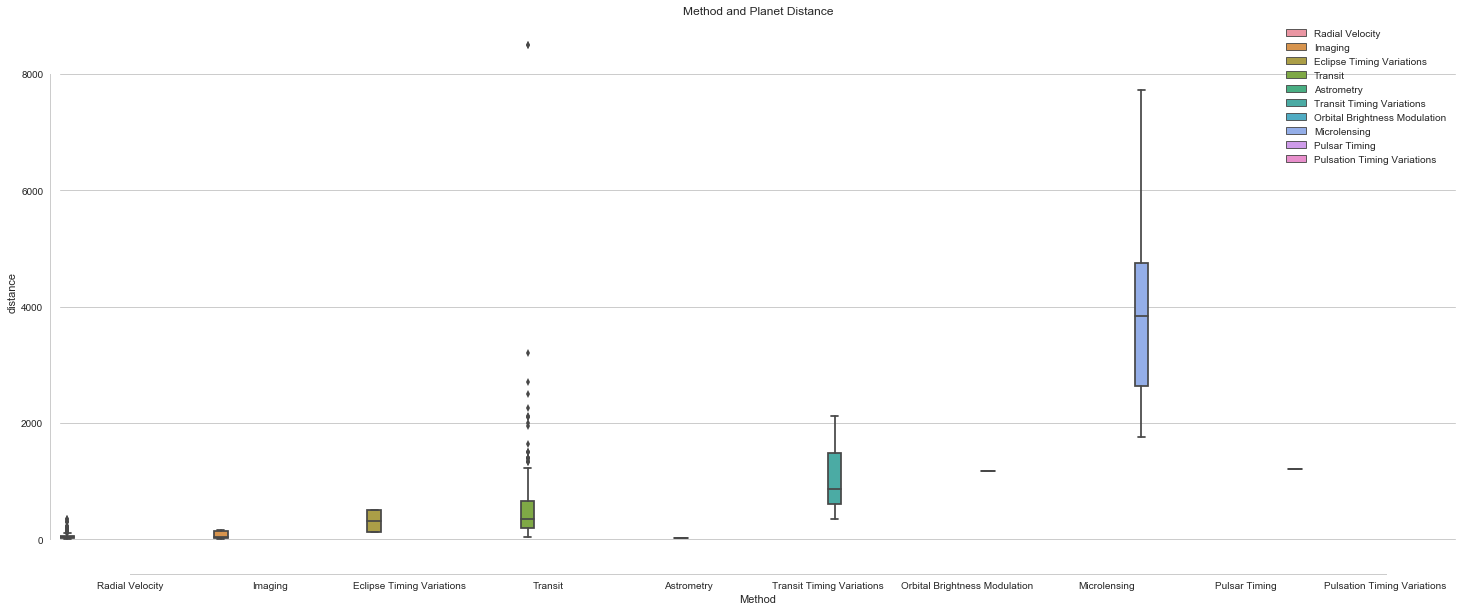

In [20]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='method',y='distance',hue='method',data=planets, width=1)
plt.title('Method and Planet Distance')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Method', ylabel='distance')
plt.legend(loc='upper right')
plt.rcParams['figure.figsize']=(25,10)

plt.show()

It looks like Microlensing takes the cake here.  The side-by-side boxplots clearly shows that microlensing is able to see planets that are much further away.  We don't get a lot of information on the methods with less variation, however -- They show up as a single line in this graph.

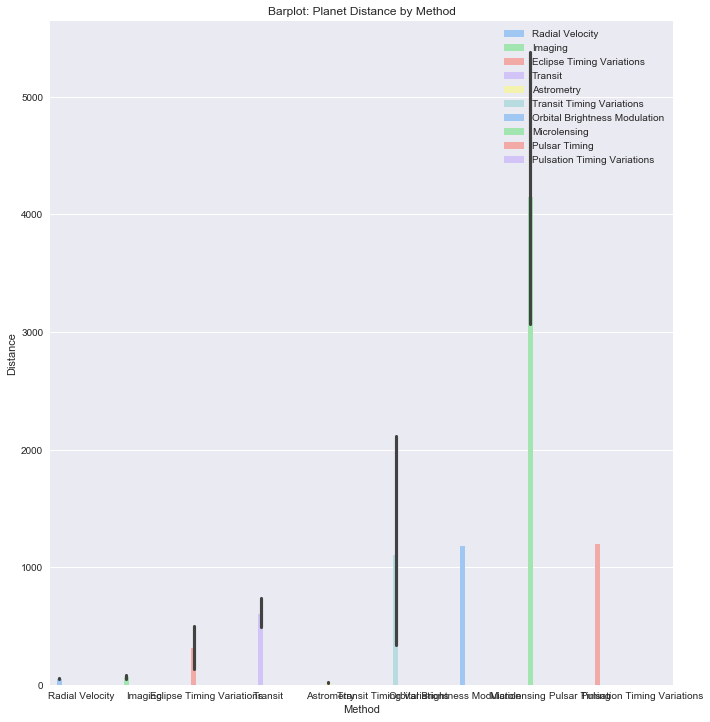

In [17]:
# Bar plots

# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="method", y="distance", hue="method", data=planets,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Distance")
g.set_xlabels("Method")
plt.title('Barplot: Planet Distance by Method')
plt.legend(loc='upper right')

plt.show()

It is also clear in this plot that Microlensing is more effective in identifying far away planets.  It has a higher mean of 4000.  Factoring in the error bar, Microlensing still beats the other methods.

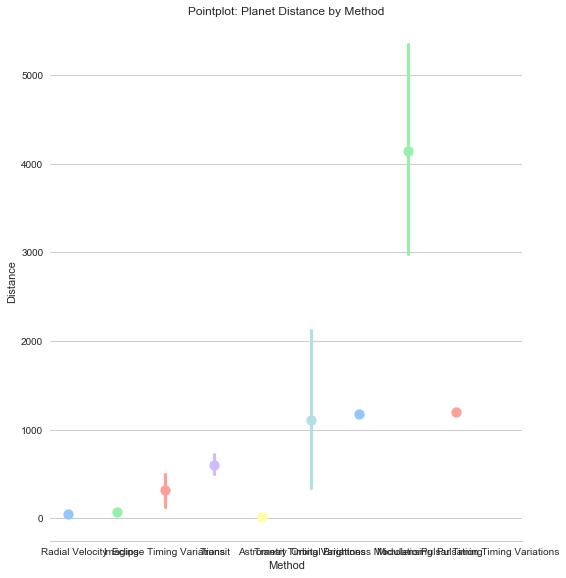

In [18]:
#Pointplot

sns.set(style="whitegrid")

g = sns.factorplot(x="method", y="distance", hue="method", data=planets,
                   size=8, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Distance")
g.set_xlabels("Method")
plt.title('Pointplot: Planet Distance by Method')
plt.show()

You can see where the means lie more clearly in this point plot, compared to the other plots.  Given that none of the plots so far had information on Pulsaton Time Variations, I guess there is no distance data for this method.

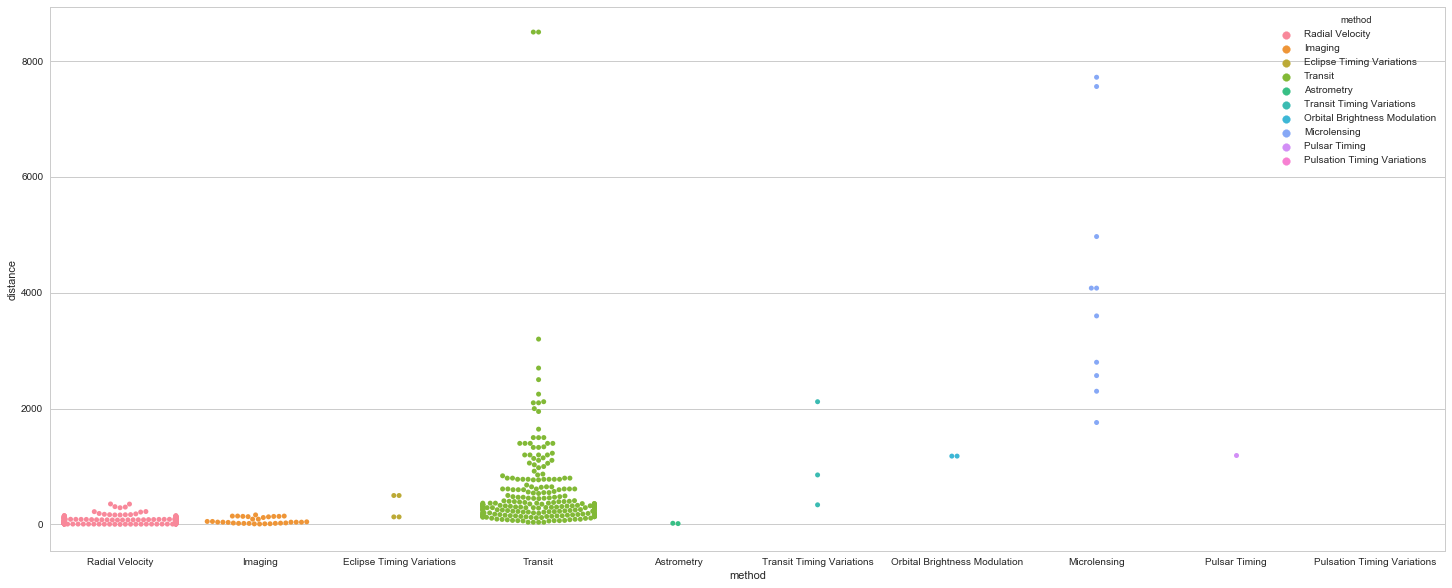

In [25]:
#Swarm plot
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" or "tidy" representation
planetsx = pd.melt(planets, "method", var_name="distance")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x=planetsx['method'], y=planets["distance"], hue=planets["method"], data=planetsx)

This is probably the most helpful plot thus far in getting a sense of what the data looks like.  We can see that most of the planets were discovered using Transit, and that the concentration of the planets discovered with this method are under 1000 in distance. However, transit has the capability to discover planets much further away -- two planets at a distance of 8000 were discovered using Transit, and they are the farthest planets in the dataset. Microlensing only has a few data points, which is why there is a larger error bar as seen in previous graphs.

This graph tells a different story than the ones before.  We see that Transit is clearly more reliable and is used most often with planet discovery.

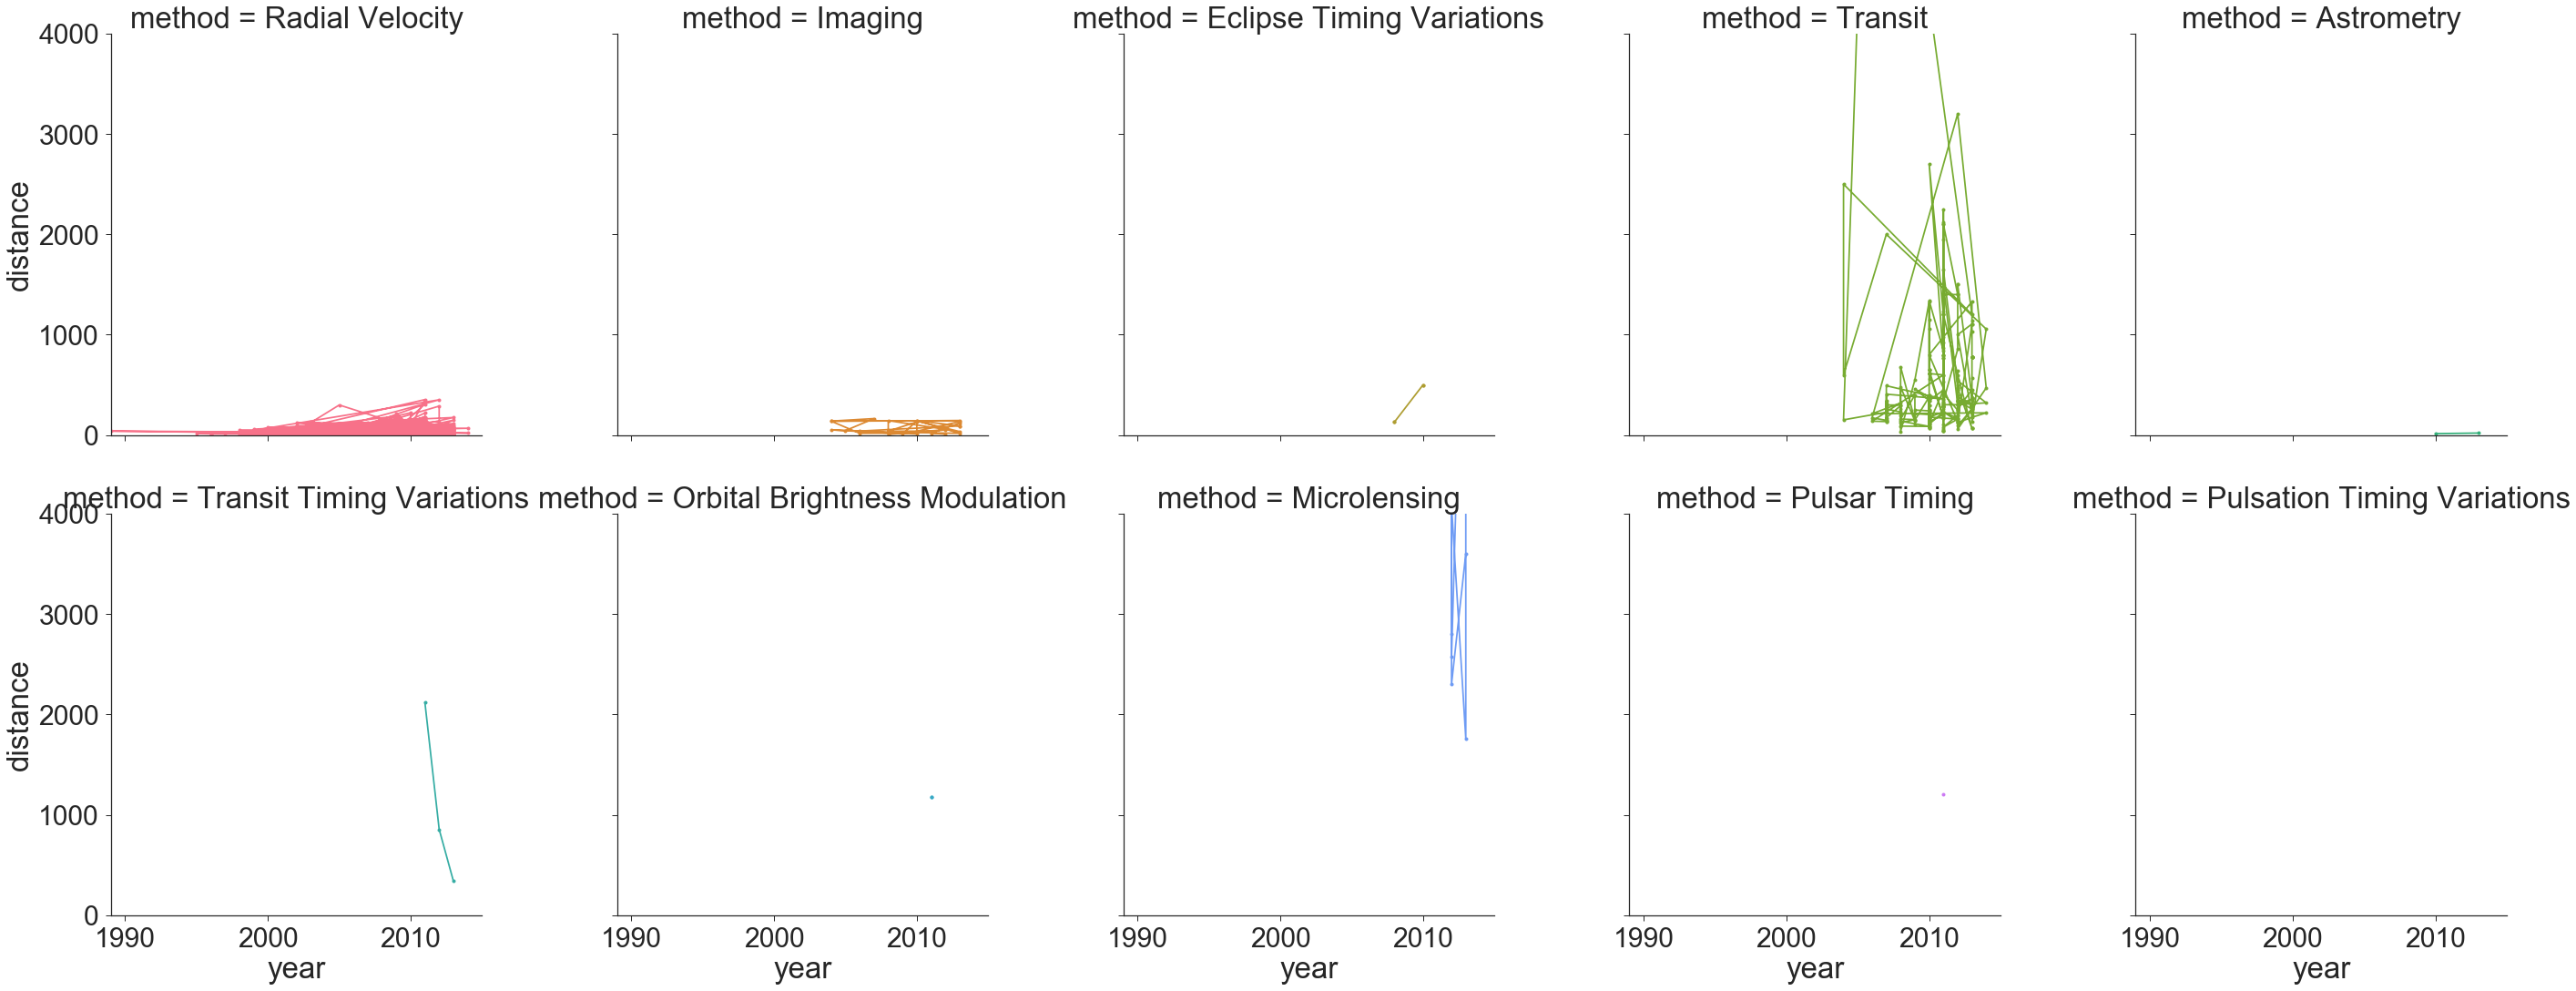

In [52]:
sns.set(style="ticks", font_scale = 3)

grid = sns.FacetGrid(planets, col="method", hue="method", col_wrap=5, size=8)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "year", "distance", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xlim=(1989,2015), ylim=(0, 4000))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

This graph isn't super helpful, but we can glean some information from it.  Transit looks to be developed in the mid-2000s and discovered planets from a variety of distances.  Radial velocity is better a identifying planets that are closer.  Transit timing variations and microlensing were used after 2010.